In [38]:
import pandas as pd

# Preparing data
We will rename columns to the same style of naming
We will also drop all columns where the track and artist are null, since it's likely that those were not really played songs

In [39]:
df = pd.read_csv('./music_project_en.csv')

In [40]:
df.describe()

,userID,Track,artist,genre,City,time,Day
count,65079,63736,57512,63881,65079,65079,65079
unique,41748,39666,37806,268,2,20392,3
top,A8AE9169,Brand,Kartvelli,pop,Springfield,08:14:07,Friday
freq,76,136,136,8850,45360,14,23149


In [49]:
df.head(10)

,userId,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
5,842029A1,Chains,Obladaet,rusrap,Shelbyville,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Springfield,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Springfield,20:47:49,Wednesday
8,8FA1D3BE,L’estate,Julia Dalia,ruspop,Springfield,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Shelbyville,21:20:49,Wednesday


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59991 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  59991 non-null  object
 1   track   59991 non-null  object
 2   artist  54156 non-null  object
 3   genre   59527 non-null  object
 4   city    59991 non-null  object
 5   time    59991 non-null  object
 6   day     59991 non-null  object
dtypes: object(7)
memory usage: 3.7+ MB


We will rename columns to have the same style, drop duplicate rows and drop rows that don't have a track and artist

In [59]:

df.rename(columns={'  City  ': 'city', '  userID': 'userId', 'Track': 'track', 'Day': 'day'}, inplace=True)
df = df.drop_duplicates().reset_index(drop=True)
df = df.dropna(subset=['track', 'artist'], how='all')

# Testing hypothesis
## Hypothesis 1. User activity differs depending on the day of the week and from city to city.

In [60]:
for city in df['city'].unique():
    print(f'Total plays in {city}: ', df[df['city'] == city]['track'].count())

Total plays in Shelbyville:  18118
Total plays in Springfield:  41873


In [61]:
for day in df['day'].unique():
    print(f'Total plays on {day}: ', df[df['day'] == day]['track'].count())

Total plays on Wednesday:  17717
Total plays on Friday:  21475
Total plays on Monday:  20799


<AxesSubplot: xlabel='city,day'>

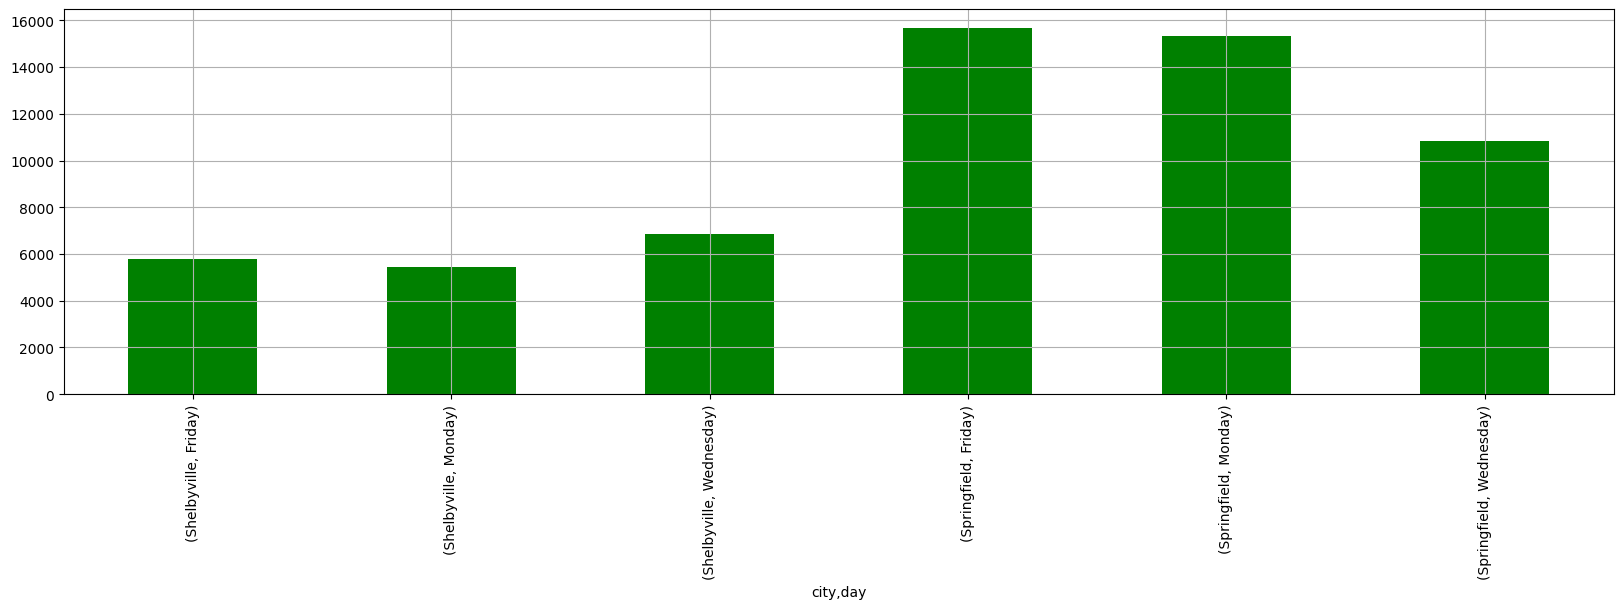

In [62]:

df.groupby(['city', 'day'])['track'].count().plot(kind='bar', figsize=(20, 5), color='green', grid=True)

### Conclusion for Hypothesis 1
**Hypothesis: User activity differs depending on the day of the week and from city to city.**

User activity really does diifer.

User activity differs much more by city than by day of the week. People in Springfield play 2 times more tracks than people in Shelbyville. 

## Hypothesis 2. On Monday mornings, Springfield and Shelbyville residents listen to different genres. This is also true for Friday evenings.

In [63]:
def calculate_genre_popularity(df):
    city_total_plays = df.shape[0]
    genre_monday_morning_value_counts = df['genre'].value_counts()

    print((genre_monday_morning_value_counts / city_total_plays * 100).head(5))

for city in df['city'].unique():
    city_df = df[df['city'] == city]
    monday_morning_city_df = city_df[city_df['time'].between('06:00:00', '12:00:00')].loc[city_df['day'] == 'Monday']
    
    print('Most popular genres to listen to on Monday mornings in the city of', city)
    calculate_genre_popularity(monday_morning_city_df)

Most popular genres to listen to on Monday mornings in the city of Shelbyville
pop           13.333333
dance         11.474359
rock          10.128205
electronic     9.423077
hip            5.064103
Name: genre, dtype: float64
Most popular genres to listen to on Monday mornings in the city of Springfield
pop           15.164015
dance         10.685523
electronic     9.428403
rock           9.192693
hip            5.480259
Name: genre, dtype: float64


In [64]:
for city in df['city'].unique():
    city_df = df[df['city'] == city]
    friday_evening_city_df = city_df[city_df['time'].between('18:00:00', '23:59:59')].loc[city_df['day'] == 'Friday']
    print('Most popular genres to listen to on Friday evenings in the city of', city)
    calculate_genre_popularity(friday_evening_city_df)

Most popular genres to listen to on Friday evenings in the city of Shelbyville
pop           12.580485
electronic    10.698366
rock          10.599307
dance         10.401189
hip            4.606241
Name: genre, dtype: float64
Most popular genres to listen to on Friday evenings in the city of Springfield
pop           13.548884
rock           9.834488
dance          9.488068
electronic     9.276366
hip            5.003849
Name: genre, dtype: float64


### Conclusion for Hypothesis 2
**On Monday mornings, Springfield and Shelbyville residents listen to different genres. This is also true for Friday evenings.**

If we look at top 5 genres for each city in a particular time interval we can see that while time interval does affect different genres being played by users, the city does not do it as much.

From a general perspective this hypothesis is not true. However further statistical analysis can be used to rate a difference more explicitly.

## Hypthesis 3. Springfield and Shelbyville listeners have different preferences. In Springfield, they prefer pop, while Shelbyville has more rap fans.

In [65]:
for city in df['city'].unique():
    city_df = df[df['city'] == city]

    print('Top genres by absolute number of listeners in', city)
    print(city_df['genre'].value_counts().head(8))

Top genres by absolute number of listeners in Shelbyville
pop            2376
dance          1921
rock           1850
electronic     1734
hip             922
classical       643
alternative     635
rusrap          563
Name: genre, dtype: int64
Top genres by absolute number of listeners in Springfield
pop           5808
dance         4413
rock          3919
electronic    3784
hip           2017
classical     1612
world         1430
ruspop        1372
Name: genre, dtype: int64


In [66]:
for city in df['city'].unique():
    city_df = df[df['city'] == city]
    total_plays = city_df.shape[0]

    print('Top genres by relative number of listeners in', city)
    print((city_df['genre'].value_counts() / total_plays * 100).head(10))

Top genres by relative number of listeners in Shelbyville
pop            13.114030
dance          10.602716
rock           10.210840
electronic      9.570593
hip             5.088862
classical       3.548957
alternative     3.504802
rusrap          3.107407
ruspop          2.969423
world           2.836958
Name: genre, dtype: float64
Top genres by relative number of listeners in Springfield
pop            13.870513
dance          10.539011
rock            9.359253
electronic      9.036850
hip             4.816946
classical       3.849736
world           3.415088
ruspop          3.276574
alternative     3.243140
rusrap          2.760729
Name: genre, dtype: float64


### Conclusion for Hypothesis 3
**Springfield and Shelbyville listeners have different preferences. In Springfield, they prefer pop, while Shelbyville has more rap fans.**

Absolute number of listeners in two cities differs a lot.
Relatively speaking people in both cities prefer music that is about the same.

This proves that hypothesis is not true.